# Dense Optical Flow ()

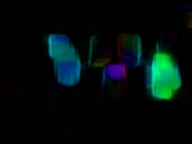

No frames grabbed!


In [9]:
import os
import time
import numpy as np
import cv2 as cv
from IPython.display import display, clear_output
from IPython.core.display import Image

this_dir: str = os.path.abspath('')
assets_dir: str = os.path.join(this_dir, "..", "assets")
video_file_path = os.path.join(assets_dir, "vtest.avi")
# Open the video using OpenCV
cap = cv.VideoCapture(video_file_path)

# Check if the video was successfully opened
if not cap.isOpened():
    print('Error: Could not open video.')
    exit()

# Read the first frame from the video
ret, frame1 = cap.read()
RESIZE_SCALE = 0.25
frame1 = cv.resize(frame1, (0, 0), fx=RESIZE_SCALE, fy=RESIZE_SCALE)
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)

vis_framerate = 30

hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
 
    frame2 = cv.resize(frame2, (0, 0), fx=RESIZE_SCALE, fy=RESIZE_SCALE)
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    # Shrink both frames to half their size for faster computation
    
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0) # type: ignore
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX) # type: ignore
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    
    # Convert to jpeg data
    _, buffer = cv.imencode('.jpg', bgr)
    clear_output(wait=True)
    # Display the frame until new frame is available
    display(Image(buffer.tobytes()))
    time.sleep(1/vis_framerate)